In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import missingno as msno
import pandas_profiling as prof
from dfply import *
import pulp

### Data Manipulation

We can fish out data we require for team selection from the original dataset

In [2]:
fixtures_1920_df = pd.read_csv("../data/vaastav/2019-20/fixtures.csv")

In [3]:
teams_1920_df = pd.read_csv("../data/vaastav/2019-20/teams.csv")

In [4]:
teams_1920_df.id.unique().tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [5]:
teams_1920_df.columns.tolist()

['code',
 'draw',
 'form',
 'id',
 'loss',
 'name',
 'played',
 'points',
 'position',
 'pulse_id',
 'short_name',
 'strength',
 'strength_attack_away',
 'strength_attack_home',
 'strength_defence_away',
 'strength_defence_home',
 'strength_overall_away',
 'strength_overall_home',
 'team_division',
 'unavailable',
 'win']

In [6]:
print(teams_1920_df.loc[1, ["code", "id", "name", "pulse_id", "strength"]])

code                  7
id                    2
name        Aston Villa
pulse_id              2
strength              2
Name: 1, dtype: object


In [7]:
teams_1920_df.head()

,code,draw,form,id,loss,name,played,points,position,pulse_id,...,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,team_division,unavailable,win
0,3,0,NaN,1,0,Arsenal,0,0,0,1,...,4,1170,1170,1200,1150,1240,1180,NaN,False,0
1,7,0,NaN,2,0,Aston Villa,0,0,0,2,...,2,980,970,1040,1000,1050,1020,NaN,False,0
2,91,0,NaN,3,0,Bournemouth,0,0,0,127,...,2,1030,990,1050,1000,1020,1020,NaN,False,0
3,36,0,NaN,4,0,Brighton,0,0,0,131,...,2,1100,1100,1030,1040,1010,1050,NaN,False,0
4,90,0,NaN,5,0,Burnley,0,0,0,43,...,3,1070,1130,1110,970,1180,1110,NaN,False,0


In [8]:
team_codes = teams_1920_df[["name", "id", "code"]].to_dict(orient="records")

In [9]:
sorted(team_codes, key=lambda x: x['id'])

[{'name': 'Arsenal', 'id': 1, 'code': 3},
 {'name': 'Aston Villa', 'id': 2, 'code': 7},
 {'name': 'Bournemouth', 'id': 3, 'code': 91},
 {'name': 'Brighton', 'id': 4, 'code': 36},
 {'name': 'Burnley', 'id': 5, 'code': 90},
 {'name': 'Chelsea', 'id': 6, 'code': 8},
 {'name': 'Crystal Palace', 'id': 7, 'code': 31},
 {'name': 'Everton', 'id': 8, 'code': 11},
 {'name': 'Leicester', 'id': 9, 'code': 13},
 {'name': 'Liverpool', 'id': 10, 'code': 14},
 {'name': 'Man City', 'id': 11, 'code': 43},
 {'name': 'Man Utd', 'id': 12, 'code': 1},
 {'name': 'Newcastle', 'id': 13, 'code': 4},
 {'name': 'Norwich', 'id': 14, 'code': 45},
 {'name': 'Sheffield Utd', 'id': 15, 'code': 49},
 {'name': 'Southampton', 'id': 16, 'code': 20},
 {'name': 'Spurs', 'id': 17, 'code': 6},
 {'name': 'Watford', 'id': 18, 'code': 57},
 {'name': 'West Ham', 'id': 19, 'code': 21},
 {'name': 'Wolves', 'id': 20, 'code': 39}]

In [10]:
fixtures_1920_df.loc[0, "stats"]

"[{'h': [{'value': 1, 'element': 183}, {'value': 1, 'element': 188}, {'value': 1, 'element': 191}], 'a': [{'value': 1, 'element': 278}], 'identifier': 'goals_scored'}, {'h': [{'value': 1, 'element': 182}, {'value': 1, 'element': 187}, {'value': 1, 'element': 188}, {'value': 1, 'element': 191}], 'a': [{'value': 1, 'element': 283}], 'identifier': 'assists'}, {'h': [], 'a': [{'value': 1, 'element': 277}], 'identifier': 'own_goals'}, {'h': [], 'a': [], 'identifier': 'penalties_saved'}, {'h': [], 'a': [], 'identifier': 'penalties_missed'}, {'h': [], 'a': [{'value': 1, 'element': 283}, {'value': 1, 'element': 288}], 'identifier': 'yellow_cards'}, {'h': [], 'a': [], 'identifier': 'red_cards'}, {'h': [{'value': 2, 'element': 189}, {'value': 2, 'element': 526}], 'a': [{'value': 4, 'element': 280}], 'identifier': 'saves'}, {'h': [{'value': 3, 'element': 188}, {'value': 2, 'element': 191}], 'a': [{'value': 1, 'element': 278}], 'identifier': 'bonus'}, {'h': [{'value': 46, 'element': 188}, {'value'

In [11]:
fixtures_1920_df.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,stats,team_a,team_a_difficulty,team_a_score,team_h,team_h_difficulty,team_h_score
0,1059702,1,True,True,1,2019-08-09T19:00:00Z,90,False,True,"[{'h': [{'value': 1, 'element': 183}, {'value'...",14,5,1,10,2,4
1,1059709,1,True,True,8,2019-08-10T11:30:00Z,90,False,True,"[{'h': [], 'a': [{'value': 3, 'element': 214},...",11,2,5,19,4,0
2,1059703,1,True,True,2,2019-08-10T14:00:00Z,90,False,True,"[{'h': [{'value': 1, 'element': 61}], 'a': [{'...",15,2,1,3,3,1
3,1059704,1,True,True,3,2019-08-10T14:00:00Z,90,False,True,"[{'h': [{'value': 2, 'element': 90}, {'value':...",16,3,0,5,3,3
4,1059705,1,True,True,4,2019-08-10T14:00:00Z,90,False,True,"[{'h': [], 'a': [], 'identifier': 'goals_score...",8,3,0,7,2,0


In [12]:
fixtures_1920_df.team_a.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [13]:
fixtures_1920_df.team_h.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [14]:
fixtures_1920_df.event.replace({39: 30, 40: 31, 41: 32, 42: 33, 43: 34, 44: 35, 45: 36, 46: 37, 47: 38}, inplace=True)

In [15]:
def fetch_team_name(row):
    return [team["name"] for team in team_codes if team["id"] == row][0]

In [16]:
fixtures_1920_df["team_a_slug"] = fixtures_1920_df.team_a.apply(lambda x: fetch_team_name(x))
fixtures_1920_df["team_h_slug"] = fixtures_1920_df.team_h.apply(lambda x: fetch_team_name(x))

In [17]:
fixtures_1920_df.event.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

In [18]:
fixtures_1920_df.columns

Index(['code', 'event', 'finished', 'finished_provisional', 'id',
       'kickoff_time', 'minutes', 'provisional_start_time', 'started', 'stats',
       'team_a', 'team_a_difficulty', 'team_a_score', 'team_h',
       'team_h_difficulty', 'team_h_score', 'team_a_slug', 'team_h_slug'],
      dtype='object')

In [19]:
away_team_1920_df = fixtures_1920_df[["team_a_slug", "team_a_difficulty", "event"]]
home_team_1920_df = fixtures_1920_df[["team_h_slug", "team_h_difficulty", "event"]]

In [20]:
home_team_1920_df

,team_h_slug,team_h_difficulty,event
0,Liverpool,2,1
1,West Ham,4,1
2,Bournemouth,3,1
3,Burnley,3,1
4,Crystal Palace,2,1
...,...,...,...
375,Leicester,4,38
376,Man City,2,38
377,Newcastle,4,38
378,Southampton,3,38


In [21]:
away_team_1920_df

,team_a_slug,team_a_difficulty,event
0,Norwich,5,1
1,Man City,2,1
2,Sheffield Utd,2,1
3,Southampton,3,1
4,Everton,3,1
...,...,...,...
375,Man Utd,3,38
376,Norwich,4,38
377,Liverpool,2,38
378,Sheffield Utd,2,38


In [22]:
len(away_team_1920_df.team_a_slug.unique())

20

In [23]:
len(home_team_1920_df.team_h_slug.unique())

20

In [24]:
away_team_1920_df_gb = away_team_1920_df.groupby(by="team_a_slug")
home_team_1920_df_gb = home_team_1920_df.groupby(by="team_h_slug")

In [25]:
def figure_groups(team_group, team, fixture):
    group = team_group[[f"team_{fixture}_difficulty"]].transpose()
    return list(zip((f"{team}, " * 20).split(", ")[:-1], (f"{fixture}, " * 20).split(", ")[:-1], \
                    [f"gw_{event}" for event in team_group["event"].tolist()], \
                           [fdr for fdr in group.iloc[0]]))


In [26]:
fdr_by_gw_home = []

In [27]:
for team in away_team_1920_df_gb.groups.keys():
    print(f"For team: {team}")
    fdr_by_gw_home.append(figure_groups(away_team_1920_df_gb.get_group(team), team, "a"))

For team: Arsenal
For team: Aston Villa
For team: Bournemouth
For team: Brighton
For team: Burnley
For team: Chelsea
For team: Crystal Palace
For team: Everton
For team: Leicester
For team: Liverpool
For team: Man City
For team: Man Utd
For team: Newcastle
For team: Norwich
For team: Sheffield Utd
For team: Southampton
For team: Spurs
For team: Watford
For team: West Ham
For team: Wolves


In [28]:
fdr_by_gw_away = []

In [29]:
for team in home_team_1920_df_gb.groups.keys():
    print(f"For team: {team}")
    fdr_by_gw_away.append(figure_groups(home_team_1920_df_gb.get_group(team), team, "h"))

For team: Arsenal
For team: Aston Villa
For team: Bournemouth
For team: Brighton
For team: Burnley
For team: Chelsea
For team: Crystal Palace
For team: Everton
For team: Leicester
For team: Liverpool
For team: Man City
For team: Man Utd
For team: Newcastle
For team: Norwich
For team: Sheffield Utd
For team: Southampton
For team: Spurs
For team: Watford
For team: West Ham
For team: Wolves


In [30]:
fdr_by_gw_away[0]

[('Arsenal', 'h', 'gw_2', 3),
 ('Arsenal', 'h', 'gw_4', 3),
 ('Arsenal', 'h', 'gw_6', 2),
 ('Arsenal', 'h', 'gw_8', 2),
 ('Arsenal', 'h', 'gw_10', 3),
 ('Arsenal', 'h', 'gw_11', 4),
 ('Arsenal', 'h', 'gw_13', 3),
 ('Arsenal', 'h', 'gw_15', 2),
 ('Arsenal', 'h', 'gw_17', 4),
 ('Arsenal', 'h', 'gw_20', 4),
 ('Arsenal', 'h', 'gw_21', 4),
 ('Arsenal', 'h', 'gw_23', 3),
 ('Arsenal', 'h', 'gw_26', 2),
 ('Arsenal', 'h', 'gw_27', 2),
 ('Arsenal', 'h', 'gw_29', 2),
 ('Arsenal', 'h', 'gw_32', 2),
 ('Arsenal', 'h', 'gw_34', 3),
 ('Arsenal', 'h', 'gw_36', 4),
 ('Arsenal', 'h', 'gw_38', 2)]

In [31]:
gw_data = [sorted(fdr_by_gw_home[idx] + fdr_by_gw_away[idx], key=lambda x: x[2]) \
 for idx, team in enumerate(list(home_team_1920_df_gb.groups.keys()))]

In [32]:
gw_data_df_1920 = pd.DataFrame(sum(gw_data,[]), columns=["team", "fixture", "gw", "fdr"])

In [33]:
gw_data_df_1920.team.sort_values().unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man Utd', 'Newcastle', 'Norwich', 'Sheffield Utd',
       'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'],
      dtype=object)

In [34]:
players_1920_id_df = pd.read_csv("../data/vaastav/2019-20/gws/merged_gw.csv")

In [35]:
pd.read_csv("../data/vaastav/2019-20/players_raw.csv").columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'creativity_rank',
       'creativity_rank_type', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded',
       'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type',
       'id', 'in_dreamteam', 'influence', 'influence_rank',
       'influence_rank_type', 'minutes', 'news', 'news_added', 'now_cost',
       'own_goals', 'penalties_missed', 'penalties_saved', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'threat', 'threat_rank', 'threat_rank_type',
       'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_

In [36]:
player_team_df = pd.read_csv("../data/vaastav/2019-20/players_raw.csv")[["team", "team_code", "id", "first_name", "second_name", "special", "element_type"]]

In [37]:
player_team_df["element"] = player_team_df["id"]

In [38]:
player_team_df

,team,team_code,id,first_name,second_name,special,element_type,element
0,1,3,1,Shkodran,Mustafi,False,2,1
1,1,3,2,Héctor,Bellerín,False,2,2
2,1,3,3,Sead,Kolasinac,False,2,3
3,1,3,4,Ainsley,Maitland-Niles,False,2,4
4,1,3,5,Sokratis,Papastathopoulos,False,2,5
...,...,...,...,...,...,...,...,...
661,20,39,587,Oskar,Buur,False,2,587
662,20,39,607,Ryan,Giles,False,2,607
663,20,39,609,Bruno André,Cavaco Jordao,False,3,609
664,20,39,619,Daniel,Castelo Podence,False,3,619


In [39]:
player_team_df.query("element == 376")

,team,team_code,id,first_name,second_name,special,element_type,element
596,19,21,376,Aaron,Cresswell,False,2,376


In [40]:
players_1920_with_team_det = pd.merge(players_1920_id_df, player_team_df, how="inner", on="element")

In [41]:
teams_df = pd.read_csv("../data/vaastav/2019-20/teams.csv")

In [42]:
teams_df

,code,draw,form,id,loss,name,played,points,position,pulse_id,...,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,team_division,unavailable,win
0,3,0,NaN,1,0,Arsenal,0,0,0,1,...,4,1170,1170,1200,1150,1240,1180,NaN,False,0
1,7,0,NaN,2,0,Aston Villa,0,0,0,2,...,2,980,970,1040,1000,1050,1020,NaN,False,0
2,91,0,NaN,3,0,Bournemouth,0,0,0,127,...,2,1030,990,1050,1000,1020,1020,NaN,False,0
3,36,0,NaN,4,0,Brighton,0,0,0,131,...,2,1100,1100,1030,1040,1010,1050,NaN,False,0
4,90,0,NaN,5,0,Burnley,0,0,0,43,...,3,1070,1130,1110,970,1180,1110,NaN,False,0
5,8,0,NaN,6,0,Chelsea,0,0,0,4,...,4,1240,1240,1250,1220,1230,1220,NaN,False,0
6,31,0,NaN,7,0,Crystal Palace,0,0,0,6,...,3,1180,1080,1040,1040,1120,1130,NaN,False,0
7,11,0,NaN,8,0,Everton,0,0,0,7,...,3,1210,1100,1180,1170,1240,1100,NaN,False,0
8,13,0,NaN,9,0,Leicester,0,0,0,26,...,3,1080,1150,1100,1210,1160,1210,NaN,False,0
9,14,0,NaN,10,0,Liverpool,0,0,0,10,...,5,1320,1310,1330,1310,1350,1340,NaN,False,0


In [43]:
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'pulse_id', 'short_name', 'strength',
       'strength_attack_away', 'strength_attack_home', 'strength_defence_away',
       'strength_defence_home', 'strength_overall_away',
       'strength_overall_home', 'team_division', 'unavailable', 'win'],
      dtype='object')

In [44]:
gw_data_df_1920["name"] = gw_data_df_1920["team"]

In [45]:
gw_data_1920_df = pd.merge(gw_data_df_1920, teams_df, how="inner", on="name")\
[["id", "team", "fixture", "gw", "fdr", "code", "pulse_id"]]

In [46]:
gw_data_1920_df.to_csv("../models/2019-20/gw_data_1920.csv")

In [47]:
gw_data_1920_df

,id,team,fixture,gw,fdr,code,pulse_id
0,1,Arsenal,a,gw_1,2,3,1
1,1,Arsenal,h,gw_10,3,3,1
2,1,Arsenal,h,gw_11,4,3,1
3,1,Arsenal,a,gw_12,3,3,1
4,1,Arsenal,h,gw_13,3,3,1
...,...,...,...,...,...,...,...
755,20,Wolves,h,gw_5,4,39,38
756,20,Wolves,a,gw_6,3,39,38
757,20,Wolves,h,gw_7,2,39,38
758,20,Wolves,a,gw_8,4,39,38


In [48]:
gw_data_1920_df["gameweek"] = gw_data_1920_df.gw.apply(lambda x: int(x.split("_")[1]))

In [49]:
gw_data_1920_df.rename(columns={"team": "team_name", "id": "team"}, inplace=True)

In [50]:
gw_data_1920_df["common_id"] = gw_data_1920_df.apply(lambda x: f"{str(x['team'])}_{str(x['gameweek'])}", axis=1)

In [51]:
gw_data_1920_df.team.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [52]:
players_1920_with_team_det.rename(columns={"GW": "gameweek"}, inplace=True)

In [53]:
players_1920_with_team_det.gameweek.replace({39: 30, 40: 31, 41: 32, 42: 33, 43: 34, 44: 35, 45: 36, 46: 37, 47: 38}, inplace=True)

In [54]:
players_1920_with_team_det["common_id"] = players_1920_with_team_det.apply(lambda x: f"{str(x['team'])}_{str(x['gameweek'])}", axis=1)

In [55]:
players_1920_with_team_det

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,gameweek,team,team_code,id,first_name,second_name,special,element_type,common_id
0,Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,...,0,1,19,21,376,Aaron,Cresswell,False,2,19_1
1,Aaron_Cresswell_376,0,0,0,0,0.0,376,13,0,0,...,0,2,19,21,376,Aaron,Cresswell,False,2,19_2
2,Aaron_Cresswell_376,0,0,0,0,0.0,376,29,0,0,...,0,3,19,21,376,Aaron,Cresswell,False,2,19_3
3,Aaron_Cresswell_376,0,0,0,0,0.0,376,40,0,0,...,0,4,19,21,376,Aaron,Cresswell,False,2,19_4
4,Aaron_Cresswell_376,0,0,0,0,0.0,376,41,0,0,...,0,5,19,21,376,Aaron,Cresswell,False,2,19_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22555,Joel_Mumbongo_665,0,0,0,0,0.0,665,366,0,0,...,0,37,5,90,665,Joel,Mumbongo,False,4,5_37
22556,Joel_Mumbongo_665,0,0,0,0,0.0,665,372,0,0,...,0,38,5,90,665,Joel,Mumbongo,False,4,5_38
22557,John-Kymani_Gordon_668,0,0,0,0,0.0,668,370,0,0,...,0,37,7,31,668,John-Kymani,Gordon,False,3,7_37
22558,John-Kymani_Gordon_668,0,0,0,0,0.0,668,374,0,0,...,0,38,7,31,668,John-Kymani,Gordon,False,3,7_38


In [56]:
players_1920_with_team_det.team.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [57]:
xp_full_1920_df = pd.merge(players_1920_with_team_det, gw_data_1920_df, how="left", on="common_id")

In [58]:
xp_full_1920_df.to_csv("../models/2019-20/full_ml_training_data_1920.csv", index=False)

In [59]:
xp_full_1920_df.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture_x', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gameweek_x', 'team_x', 'team_code', 'id',
       'first_name', 'second_name', 'special', 'element_type', 'common_id',
       'team_y', 'team_name', 'fixture_y', 'gw', 'fdr', 'code', 'pulse_id',
       'gameweek_y'],
      dtype='object')

In [60]:
position_mapper = {
    1: "GKP",
    2: "DEF",
    3: "MID",
    4: "FWD"
}

In [61]:
xp_full_1920_df["position"] = xp_full_1920_df.element_type.apply(lambda x: position_mapper.get(x))

In [62]:
xp_full_1920_df.to_csv("../data/vaastav/ml_training_data_1920.csv", index=False)

In [63]:
xp_full_1920_df

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture_x,goals_conceded,goals_scored,...,common_id,team_y,team_name,fixture_y,gw,fdr,code,pulse_id,gameweek_y,position
0,Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,...,19_1,19,West Ham,h,gw_1,4,21,25,1,DEF
1,Aaron_Cresswell_376,0,0,0,0,0.0,376,13,0,0,...,19_2,19,West Ham,a,gw_2,2,21,25,2,DEF
2,Aaron_Cresswell_376,0,0,0,0,0.0,376,29,0,0,...,19_3,19,West Ham,a,gw_3,3,21,25,3,DEF
3,Aaron_Cresswell_376,0,0,0,0,0.0,376,40,0,0,...,19_4,19,West Ham,h,gw_4,2,21,25,4,DEF
4,Aaron_Cresswell_376,0,0,0,0,0.0,376,41,0,0,...,19_5,19,West Ham,a,gw_5,2,21,25,5,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22931,Joel_Mumbongo_665,0,0,0,0,0.0,665,366,0,0,...,5_37,5,Burnley,a,gw_37,2,90,43,37,FWD
22932,Joel_Mumbongo_665,0,0,0,0,0.0,665,372,0,0,...,5_38,5,Burnley,h,gw_38,2,90,43,38,FWD
22933,John-Kymani_Gordon_668,0,0,0,0,0.0,668,370,0,0,...,7_37,7,Crystal Palace,a,gw_37,3,31,6,37,MID
22934,John-Kymani_Gordon_668,0,0,0,0,0.0,668,374,0,0,...,7_38,7,Crystal Palace,h,gw_38,3,31,6,38,MID


### Feature Engineering

In [64]:
xp_full_1920_df.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture_x', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gameweek_x', 'team_x', 'team_code', 'id',
       'first_name', 'second_name', 'special', 'element_type', 'common_id',
       'team_y', 'team_name', 'fixture_y', 'gw', 'fdr', 'code', 'pulse_id',
       'gameweek_y', 'position'],
      dtype='object')

In [65]:
training_data = xp_full_1920_df[["element", "assists", "bonus", "bps", "clean_sheets", "creativity", "goals_conceded",\
                "goals_scored", "ict_index", "influence", "minutes", "own_goals", "penalties_missed", \
                "penalties_saved", "red_cards", "saves", "selected", "threat", "transfers_balance", \
                "transfers_in", "transfers_out", "value", "was_home", "yellow_cards", "gameweek_x", "fdr", \
                "total_points"]]

In [66]:
training_data.columns

Index(['element', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'saves', 'selected', 'threat', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'gameweek_x',
       'fdr', 'total_points'],
      dtype='object')

In [67]:
training_data.sort_values(by=["element", "gameweek_x"], inplace=True)

<ipython-input-67-48e9d31bfed0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.sort_values(by=["element", "gameweek_x"], inplace=True)


In [68]:
training_data["total_points_cumulative"] = training_data.groupby(by=["element"])["total_points"].cumsum()

<ipython-input-68-ba0261909756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data["total_points_cumulative"] = training_data.groupby(by=["element"])["total_points"].cumsum()


In [69]:
lag_variables = ["assists", "bonus", "bps", "clean_sheets", "goals_conceded", "goals_scored", "minutes", \
                "own_goals", "penalties_missed", "penalties_saved", "red_cards", "yellow_cards", "saves", \
                "selected", "threat", "transfers_in", "transfers_out", "total_points"]

In [70]:
 pd.options.mode.chained_assignment = None

In [81]:
training_data["assists_prev"] = training_data.groupby(by=["element"])["assists"].shift(1)

In [84]:
for var in lag_variables:
    new_var = f"{var}_prev"
    print(f"Adding new column:{new_var}")
    training_data[new_var] = training_data.groupby(by=["element"])[var].shift(1)

Adding new column:assists_prev
Adding new column:bonus_prev
Adding new column:bps_prev
Adding new column:clean_sheets_prev
Adding new column:goals_conceded_prev
Adding new column:goals_scored_prev
Adding new column:minutes_prev
Adding new column:own_goals_prev
Adding new column:penalties_missed_prev
Adding new column:penalties_saved_prev
Adding new column:red_cards_prev
Adding new column:yellow_cards_prev
Adding new column:saves_prev
Adding new column:selected_prev
Adding new column:threat_prev
Adding new column:transfers_in_prev
Adding new column:transfers_out_prev
Adding new column:total_points_prev


In [85]:
def create_lag_variable_list(dataframe, var, lag_window):
    return dataframe.groupby(by=["element"])[f"{var}_prev"].rolling(lag_window).sum().tolist()

In [86]:
for var in lag_variables:
    for window in [1, 3, 5, 10]:
        new_var = f"{var}_in_prev_{window}"
        print(f"Adding new column:{new_var}")
        training_data[new_var] = create_lag_variable_list(training_data, var, window)

Adding new column:assists_in_prev_1
Adding new column:assists_in_prev_3
Adding new column:assists_in_prev_5
Adding new column:assists_in_prev_10
Adding new column:bonus_in_prev_1
Adding new column:bonus_in_prev_3
Adding new column:bonus_in_prev_5
Adding new column:bonus_in_prev_10
Adding new column:bps_in_prev_1
Adding new column:bps_in_prev_3
Adding new column:bps_in_prev_5
Adding new column:bps_in_prev_10
Adding new column:clean_sheets_in_prev_1
Adding new column:clean_sheets_in_prev_3
Adding new column:clean_sheets_in_prev_5
Adding new column:clean_sheets_in_prev_10
Adding new column:goals_conceded_in_prev_1
Adding new column:goals_conceded_in_prev_3
Adding new column:goals_conceded_in_prev_5
Adding new column:goals_conceded_in_prev_10
Adding new column:goals_scored_in_prev_1
Adding new column:goals_scored_in_prev_3
Adding new column:goals_scored_in_prev_5
Adding new column:goals_scored_in_prev_10
Adding new column:minutes_in_prev_1
Adding new column:minutes_in_prev_3
Adding new col

In [87]:
training_data["fdr_in_prev_1"] = training_data.groupby(by=["element"])["fdr"].shift(-1)
training_data["fdr_in_prev_2"] = training_data.groupby(by=["element"])["fdr"].shift(-2)
training_data["fdr_in_prev_3"] = training_data.groupby(by=["element"])["fdr"].shift(-3)

In [88]:
training_data

,element,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,...,transfers_out_in_prev_3,transfers_out_in_prev_5,transfers_out_in_prev_10,total_points_in_prev_1,total_points_in_prev_3,total_points_in_prev_5,total_points_in_prev_10,fdr_in_prev_1,fdr_in_prev_2,fdr_in_prev_3
18199,1,0,0,0,0,0.0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0
18200,1,0,0,0,0,0.0,0,0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5.0,3.0,3.0
18201,1,0,0,0,0,0.0,0,0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,3.0,2.0
18202,1,0,0,0,0,0.0,0,0,0.0,0.0,...,15564.0,NaN,NaN,0.0,0.0,NaN,NaN,3.0,2.0,4.0
18203,1,0,0,0,0,0.0,0,0,0.0,0.0,...,19782.0,NaN,NaN,0.0,0.0,NaN,NaN,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,667,0,0,0,0,0.0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
22930,667,0,0,0,0,0.0,0,0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22933,668,0,0,0,0,0.0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
22934,668,0,0,0,0,0.0,0,0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
training_data[["fdr", "fdr_in_prev_1", "fdr_in_prev_2", "fdr_in_prev_3"]]

,fdr,fdr_in_prev_1,fdr_in_prev_2,fdr_in_prev_3
18199,2,3.0,5.0,3.0
18200,3,5.0,3.0,3.0
18201,5,3.0,3.0,2.0
18202,3,3.0,2.0,4.0
18203,3,2.0,4.0,2.0
...,...,...,...,...
22929,3,2.0,NaN,NaN
22930,2,NaN,NaN,NaN
22933,3,3.0,NaN,NaN
22934,3,NaN,NaN,NaN


In [90]:
training_data.query("fdr_in_prev_1.isna()").gameweek_x.unique()

array([38])

In [91]:
unseen_data = training_data.query("gameweek_x == 38")

In [92]:
test_data = training_data.query("gameweek_x == 37")

In [93]:
training_data = training_data.query("gameweek_x not in [37, 38]")

In [95]:
!mkdir -p '../data/training_1920'

In [96]:
test_data.to_csv("../data/training_1920/test.csv", index=False)

In [97]:
training_data.to_csv("../data/training_1920/train.csv", index=False)

In [98]:
unseen_data.to_csv("../data/training_1920/unseen.csv", index=False)

### Baseline model

In [99]:
training_data.columns

Index(['element', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       ...
       'transfers_out_in_prev_3', 'transfers_out_in_prev_5',
       'transfers_out_in_prev_10', 'total_points_in_prev_1',
       'total_points_in_prev_3', 'total_points_in_prev_5',
       'total_points_in_prev_10', 'fdr_in_prev_1', 'fdr_in_prev_2',
       'fdr_in_prev_3'],
      dtype='object', length=121)

In [100]:
columns_drop = ["transfers_balance", "element", "total_points_cumulative", "total_points", "gameweek_x", \
               "total_points_in_prev_1", "total_points_in_prev_3", "total_points_in_prev_5", \
               "total_points_in_prev_10", "fdr_in_prev_1", "fdr_in_prev_2", "fdr_in_prev_3"] + lag_variables


In [101]:
X_train = training_data.drop(labels=columns_drop, axis=1)
y_train = training_data[["total_points"]]

In [102]:
training_data.shape, X_train.shape, y_train.shape

((21605, 121), (21605, 92), (21605, 1))

In [103]:
X_valid = test_data.drop(labels=columns_drop, axis=1)
y_valid = test_data[["total_points"]]

In [104]:
X_valid.shape, y_valid.shape

((665, 92), (665, 1))

In [105]:
X_train.fillna(value=0, inplace=True)

<AxesSubplot:>

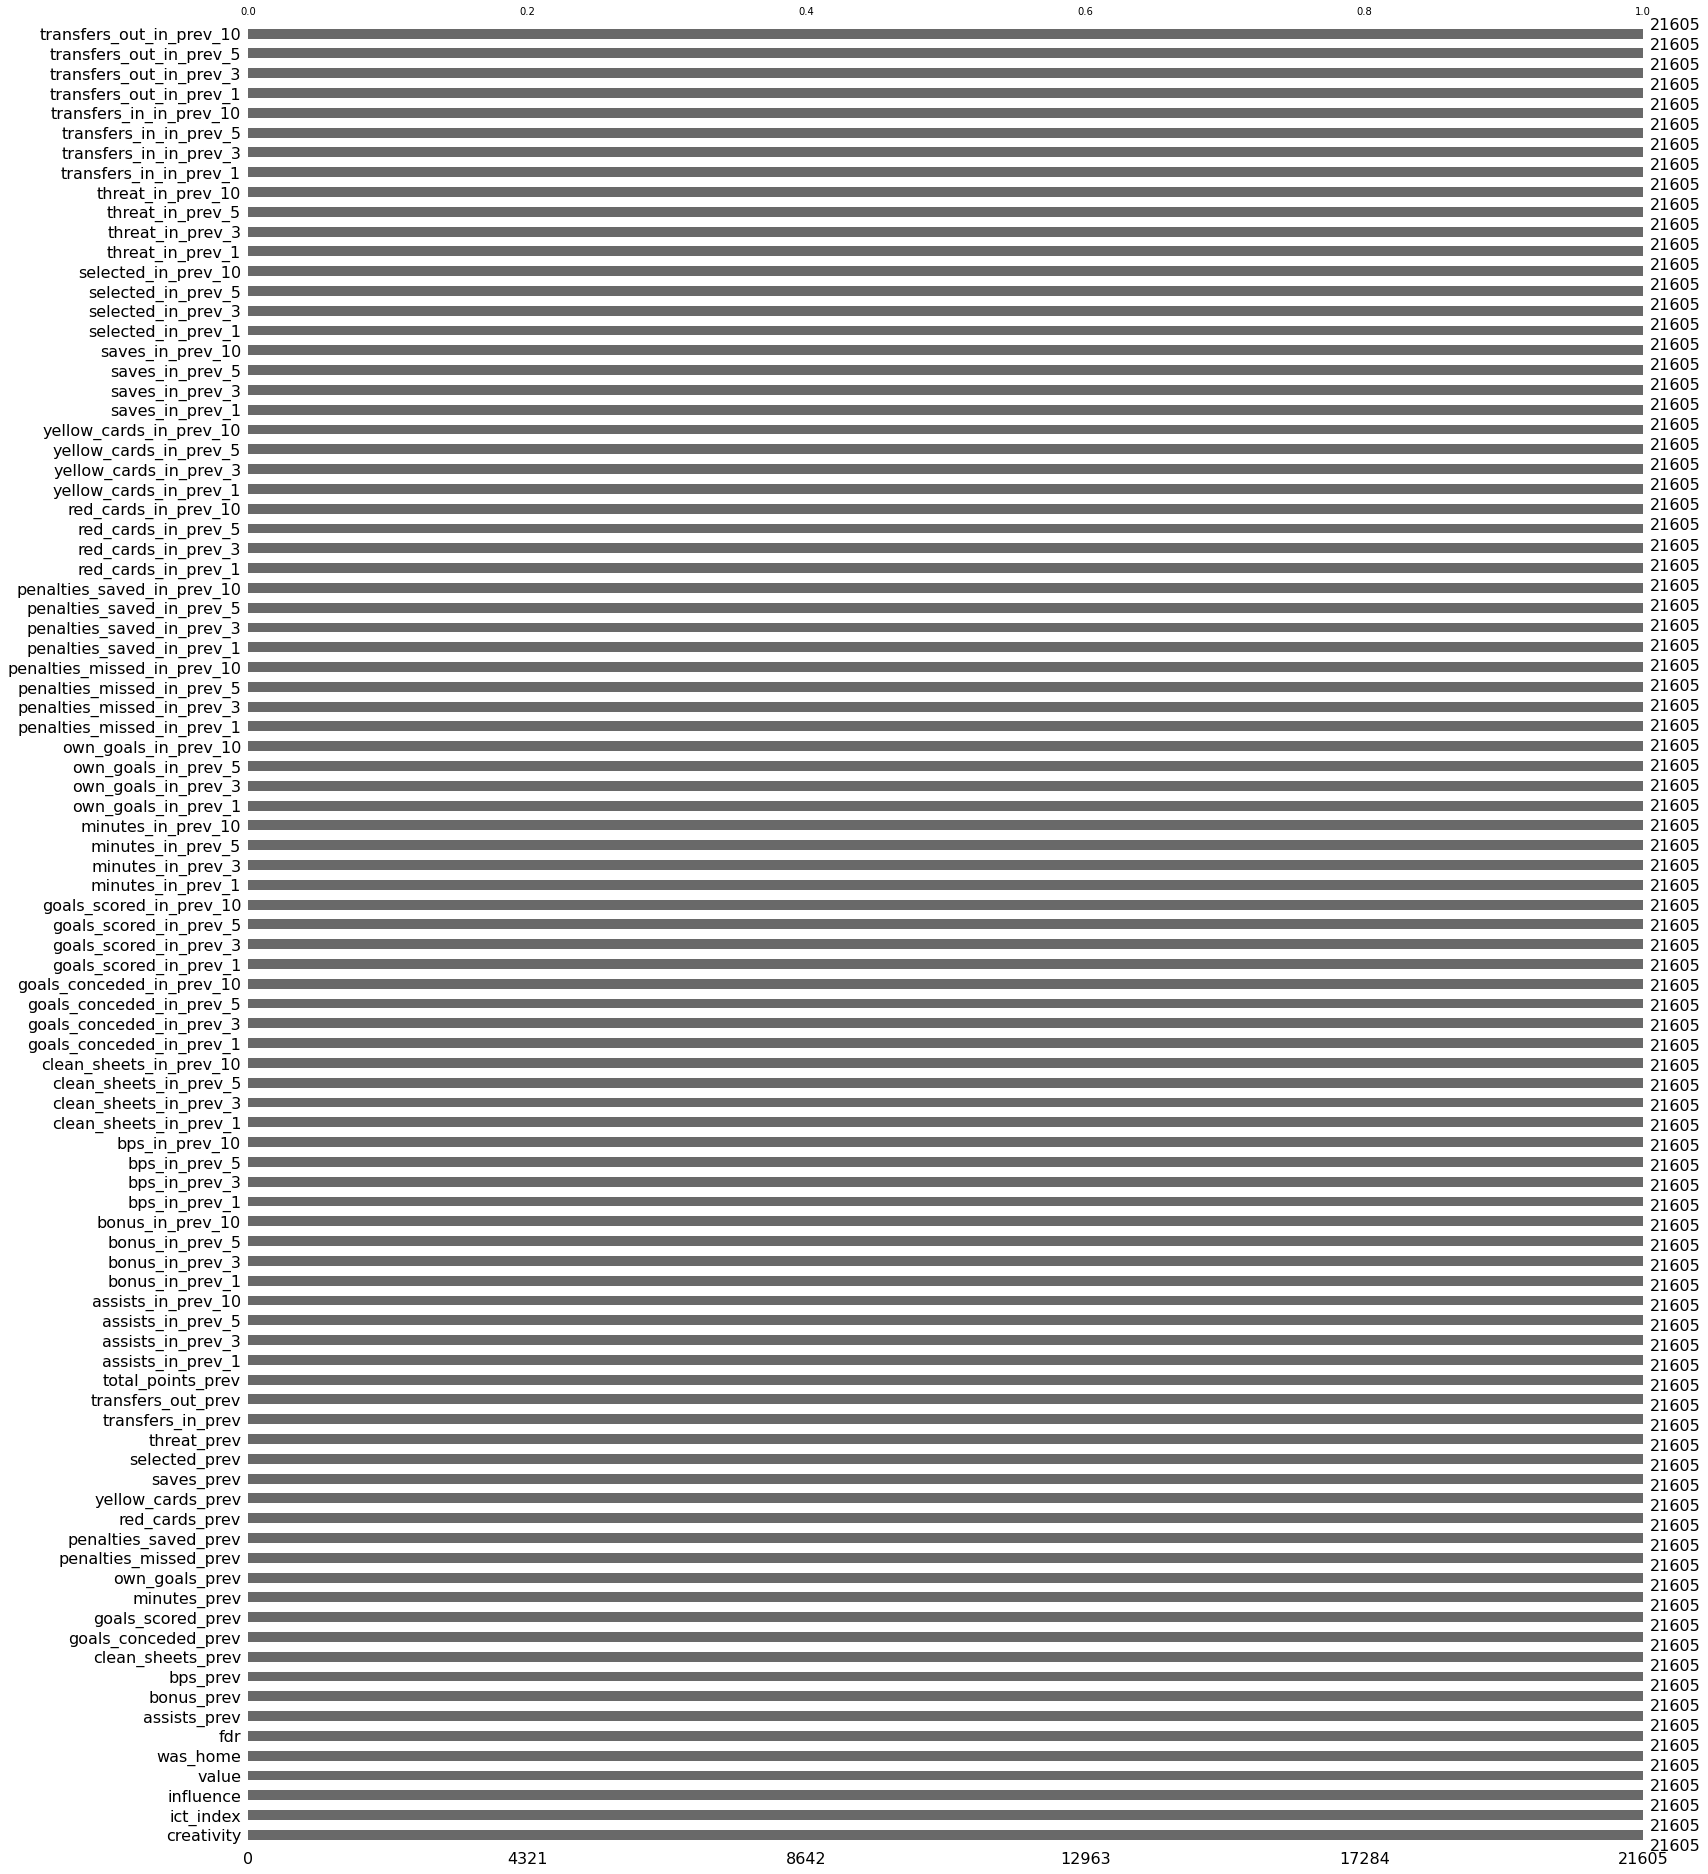

In [106]:
msno.bar(X_train)

In [107]:
X_valid.fillna(value=0, inplace=True)

<AxesSubplot:>

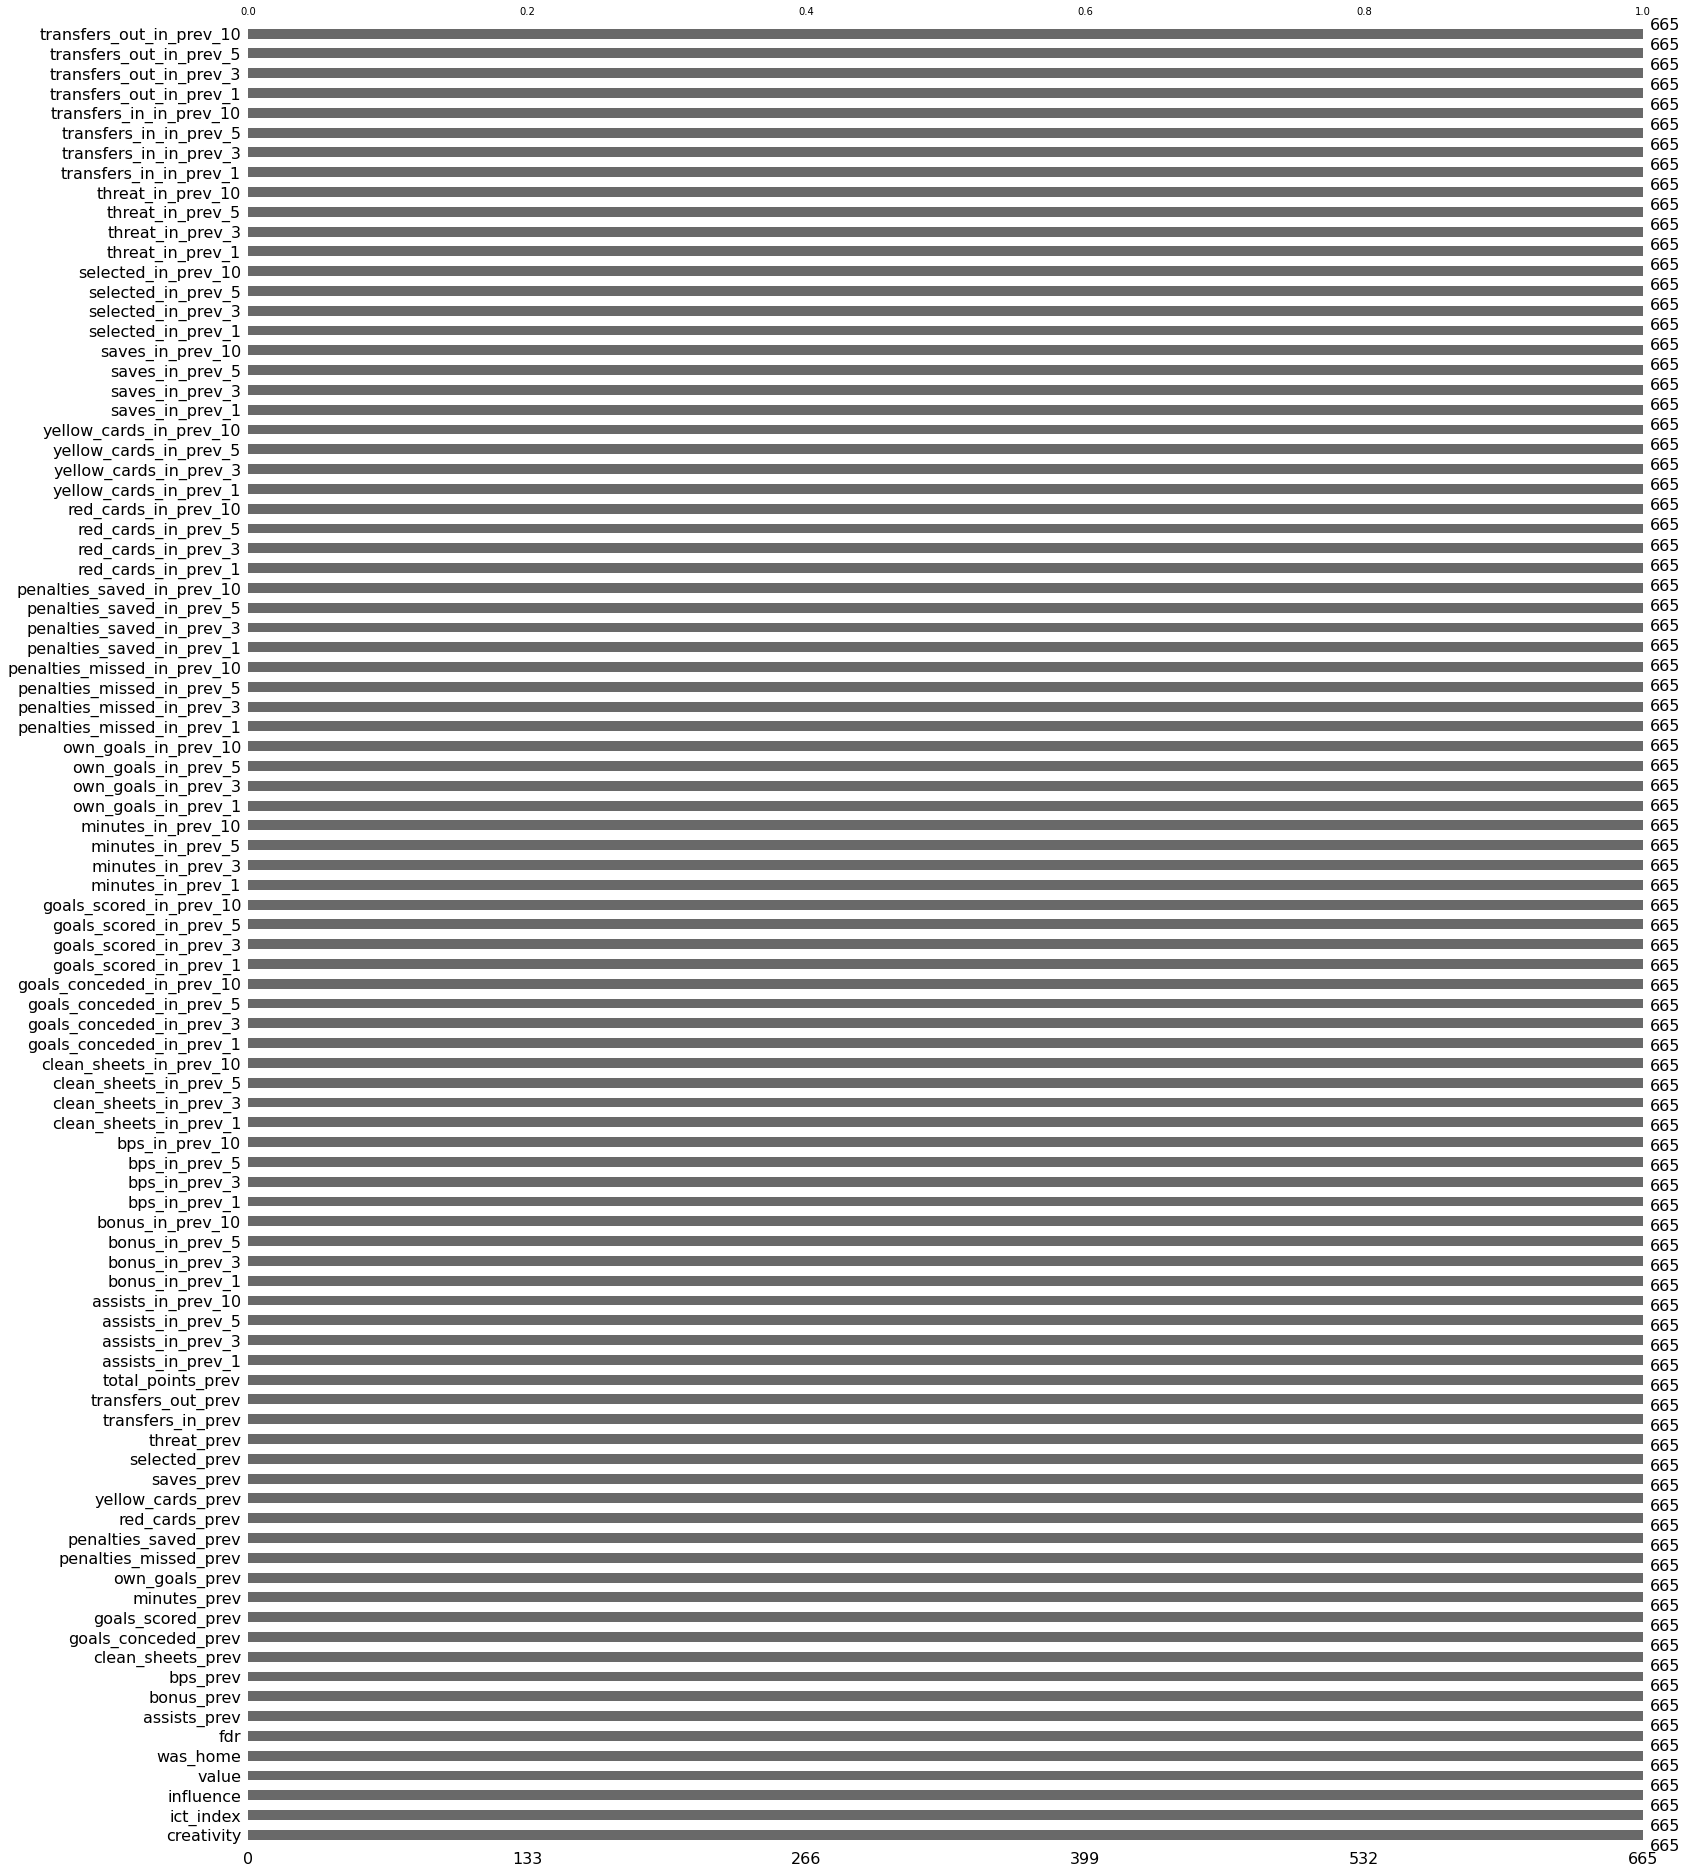

In [108]:
msno.bar(X_valid)

<AxesSubplot:>

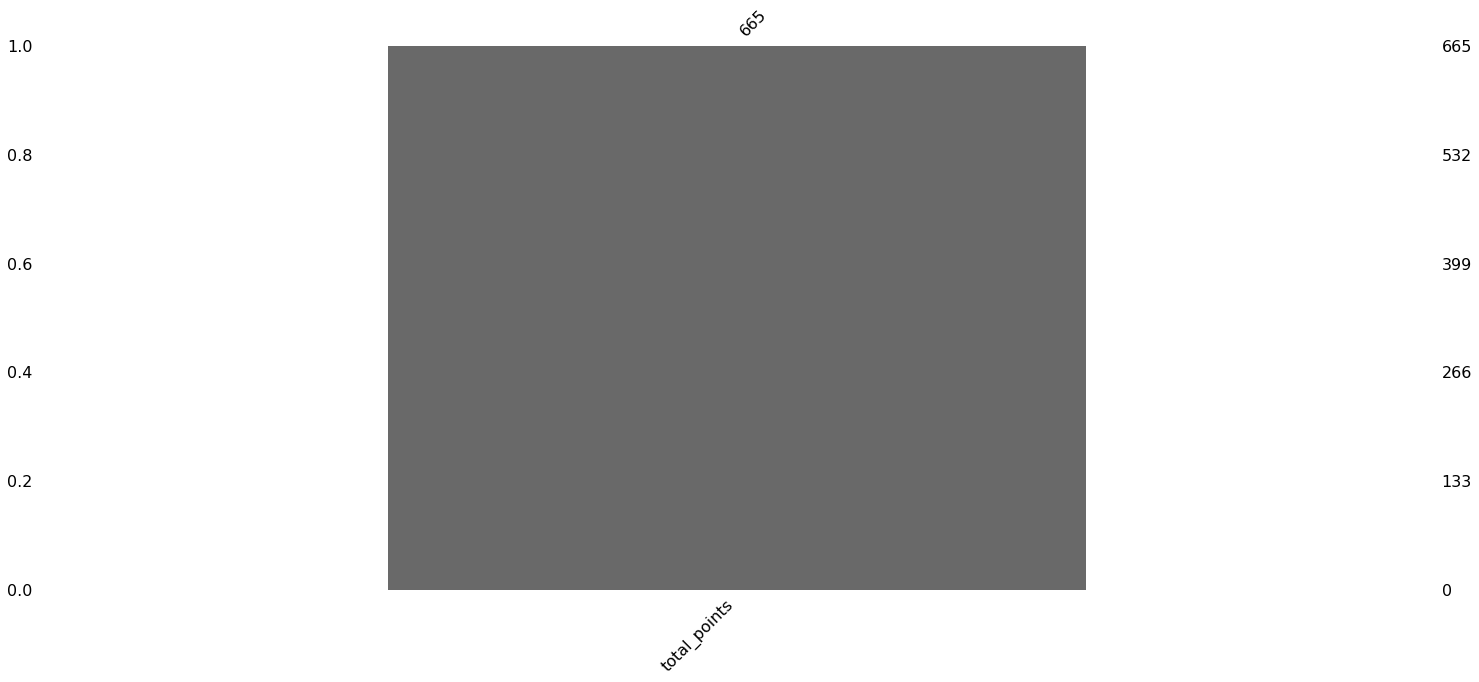

In [109]:
msno.bar(y_valid)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
model = LinearRegression(fit_intercept=True)

In [112]:
%time model.fit(X_train, y_train)

CPU times: user 661 ms, sys: 188 ms, total: 848 ms
Wall time: 229 ms


LinearRegression()

In [113]:
model.intercept_, model.coef_

(array([-0.05224924]),
 array([[-1.53820373e-02,  1.44374076e-01,  1.32074687e-01,
          9.22186480e-03,  1.62322727e-01, -1.27652789e-01,
         -1.52893353e-01, -4.21493686e-03, -9.92472152e-03,
         -9.46531381e-02,  7.03330330e-03, -1.86642766e-01,
         -7.07963160e-06, -2.67726204e-01,  1.68666369e-01,
         -3.96038664e-01,  3.69914273e-02, -2.25641996e-02,
         -3.87980460e-02, -1.85261267e-07,  1.67453224e-03,
          5.33094884e-07,  2.71823313e-07,  1.40905124e-01,
         -1.52893353e-01, -4.30952474e-03,  8.60953115e-02,
          3.05676086e-02, -4.21493687e-03, -6.87104557e-02,
          5.24377894e-02, -4.94395811e-02, -9.92472150e-03,
          2.47039609e-03, -6.12111640e-03,  6.31732532e-04,
         -9.46531381e-02,  1.24917516e-01,  4.05670839e-02,
          1.26477003e-02,  7.03330329e-03,  1.62815763e-02,
          2.51683212e-02, -3.14198571e-02, -1.86642766e-01,
          7.27689588e-02,  4.85736181e-03,  5.43032587e-02,
         -7.07963

In [114]:
list(zip(X_train.columns.tolist(), list(model.coef_[0])))

[('creativity', -0.01538203725534434),
 ('ict_index', 0.1443740760979976),
 ('influence', 0.13207468690702834),
 ('value', 0.009221864798839274),
 ('was_home', 0.16232272652472307),
 ('fdr', -0.12765278900194646),
 ('assists_prev', -0.15289335266716456),
 ('bonus_prev', -0.004214936862601745),
 ('bps_prev', -0.009924721518668196),
 ('clean_sheets_prev', -0.09465313814405231),
 ('goals_conceded_prev', 0.007033303295978731),
 ('goals_scored_prev', -0.18664276581264672),
 ('minutes_prev', -7.079631601028535e-06),
 ('own_goals_prev', -0.26772620407845504),
 ('penalties_missed_prev', 0.16866636888855552),
 ('penalties_saved_prev', -0.39603866376233077),
 ('red_cards_prev', 0.03699142734642659),
 ('yellow_cards_prev', -0.022564199639053678),
 ('saves_prev', -0.03879804599309786),
 ('selected_prev', -1.8526126654982988e-07),
 ('threat_prev', 0.0016745322417090654),
 ('transfers_in_prev', 5.330948841669736e-07),
 ('transfers_out_prev', 2.7182331322969655e-07),
 ('total_points_prev', 0.14090512

In [115]:
%time predictions = model.predict(X_valid)

CPU times: user 2.21 ms, sys: 60.4 ms, total: 62.6 ms
Wall time: 8.52 ms


In [116]:
predictions = [round(pred[0], ndigits=3) for pred in predictions]

In [117]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions))
print('RSquared value:', metrics.r2_score(y_valid, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

Mean Absolute Error: 0.7498691729323308
RSquared value: 0.6899845118737322
Mean Squared Error: 1.9644673218045114
Root Mean Squared Error: 1.4015945639893554


In [118]:
actual_results = y_valid.total_points.tolist()
comparison_df = pd.DataFrame(zip(predictions, actual_results), \
                                 columns=["model_predictions", "actual_results"])

In [119]:
comparison_df.sort_values(by=["actual_results"], ascending=False)

,model_predictions,actual_results
213,14.325,17
401,6.410,13
181,11.303,13
337,13.404,13
441,5.850,12
...,...,...
429,3.959,-1
355,2.163,-1
272,3.633,-1
282,0.110,-2


In [120]:
comparison_df.shape

(665, 2)

In [121]:
plt.figure(figsize=(16, 10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

#### Learn more here: [link](https://stats.stackexchange.com/questions/104622/what-does-an-actual-vs-fitted-graph-tell-us)

In [122]:
player_general_info_1920_df = xp_full_1920_df[["first_name", "second_name", "position", "team_name", "element"]]

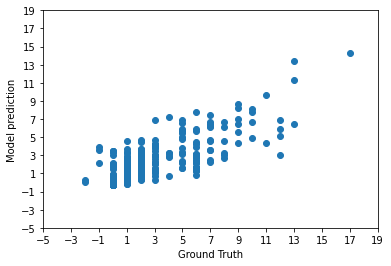

In [123]:
plt.scatter(comparison_df.actual_results, comparison_df.model_predictions)
plt.xlabel("Ground Truth")
plt.ylabel("Model prediction")
plt.xticks(np.arange(-5, 20, 2))
plt.yticks(np.arange(-5, 20, 2))
plt.show()

In [124]:
comparison_df["element"] = test_data[test_data.index.isin(y_valid.index.tolist())]["element"].tolist()

In [125]:
comparison_df.shape

(665, 3)

In [126]:
final_predictions_df = pd.merge(player_general_info_1920_df, comparison_df, how="inner", on="element").\
drop_duplicates().sort_values(by="model_predictions", ascending=False)

In [127]:
final_predictions_df.query("position == 'GKP'")

,first_name,second_name,position,team_name,element,model_predictions,actual_results
116,Aaron,Ramsdale,GKP,Bournemouth,494,9.647,11
2320,Ben,Foster,GKP,Watford,366,8.188,9
18895,Tim,Krul,GKP,Norwich,280,6.933,3
7708,Hugo,Lloris,GKP,Spurs,340,4.961,10
854,Alex,McCarthy,GKP,Southampton,318,4.718,7
...,...,...,...,...,...,...,...
21907,Joseph,Anang,GKP,West Ham,582,-0.193,0
21109,David,Martin,GKP,West Ham,553,-0.194,0
22349,Darren,Randolph,GKP,West Ham,606,-0.195,0
19893,Willy,Caballero,GKP,Chelsea,112,-0.274,0


In [128]:
final_predictions_df.query("position == 'DEF'")

,first_name,second_name,position,team_name,element,model_predictions,actual_results
19163,Trent,Alexander-Arnold,DEF,Liverpool,182,11.303,13
2048,Aymeric,Laporte,DEF,Man City,202,6.911,12
10025,Jonathan,Castro Otto,DEF,Wolves,402,6.410,13
19317,Tyrone,Mings,DEF,Aston Villa,445,5.850,12
1124,Andrew,Robertson,DEF,Liverpool,181,5.682,5
...,...,...,...,...,...,...,...
17467,Ryan,Fredericks,DEF,West Ham,380,-0.227,0
1048,Andreas,Christensen,DEF,Chelsea,108,-0.259,0
4644,Davide,Zappacosta,DEF,Chelsea,109,-0.300,0
6470,Fikayo,Tomori,DEF,Chelsea,529,-0.312,0


In [129]:
final_predictions_df.query("position == 'MID'")

,first_name,second_name,position,team_name,element,model_predictions,actual_results
16376,Raheem,Sterling,MID,Man City,214,14.325,17
3562,Christian,Pulisic,MID,Chelsea,431,8.681,9
12585,Mahmoud Ahmed,Ibrahim Hassan,MID,Aston Villa,465,8.162,10
11298,Kevin,De Bruyne,MID,Man City,215,7.769,6
12196,Lucas,Rodrigues Moura da Silva,MID,Spurs,345,7.729,10
...,...,...,...,...,...,...,...
16847,Robert Kenedy,Nunes do Nascimento,MID,Chelsea,462,-0.210,0
22694,Faustino,Anjorin,MID,Chelsea,630,-0.276,0
22902,Lewis,Bate,MID,Chelsea,657,-0.276,0
20505,Billy,Gilmour,MID,Chelsea,533,-0.286,0


In [130]:
final_predictions_df.sort_values(by=["actual_results"], ascending=False).query("position == 'FWD'").head(10)

,first_name,second_name,position,team_name,element,model_predictions,actual_results
7361,Harry,Kane,FWD,Spurs,338,13.404,13
13319,Mason,Greenwood,FWD,Man Utd,234,7.014,9
16885,Roberto,Firmino,FWD,Liverpool,187,6.124,8
3754,Chris,Wood,FWD,Burnley,91,6.255,7
3334,Che,Adams,FWD,Southampton,437,7.408,7
18705,Tammy,Abraham,FWD,Chelsea,460,5.439,5
15372,Olivier,Giroud,FWD,Chelsea,110,6.877,5
16495,Raúl,Jiménez,FWD,Wolves,409,3.408,5
14125,Michael,Obafemi,FWD,Southampton,314,2.891,4
4378,Danny,Ings,FWD,Southampton,313,7.282,4


In [131]:
final_predictions_df.to_csv("../data/training_1920/gw_38_1920_predictions.csv", index=False)

In [132]:
player_general_info_1920_df.to_csv("../data/training_1920/season_2019_2021_player_info.csv", index=False)

### Predictions on unseen dataset

In [133]:
X_test = unseen_data.drop(labels=columns_drop, axis=1)
y_test = unseen_data[["total_points"]]

In [134]:
X_test.fillna(0, inplace=True)

<AxesSubplot:>

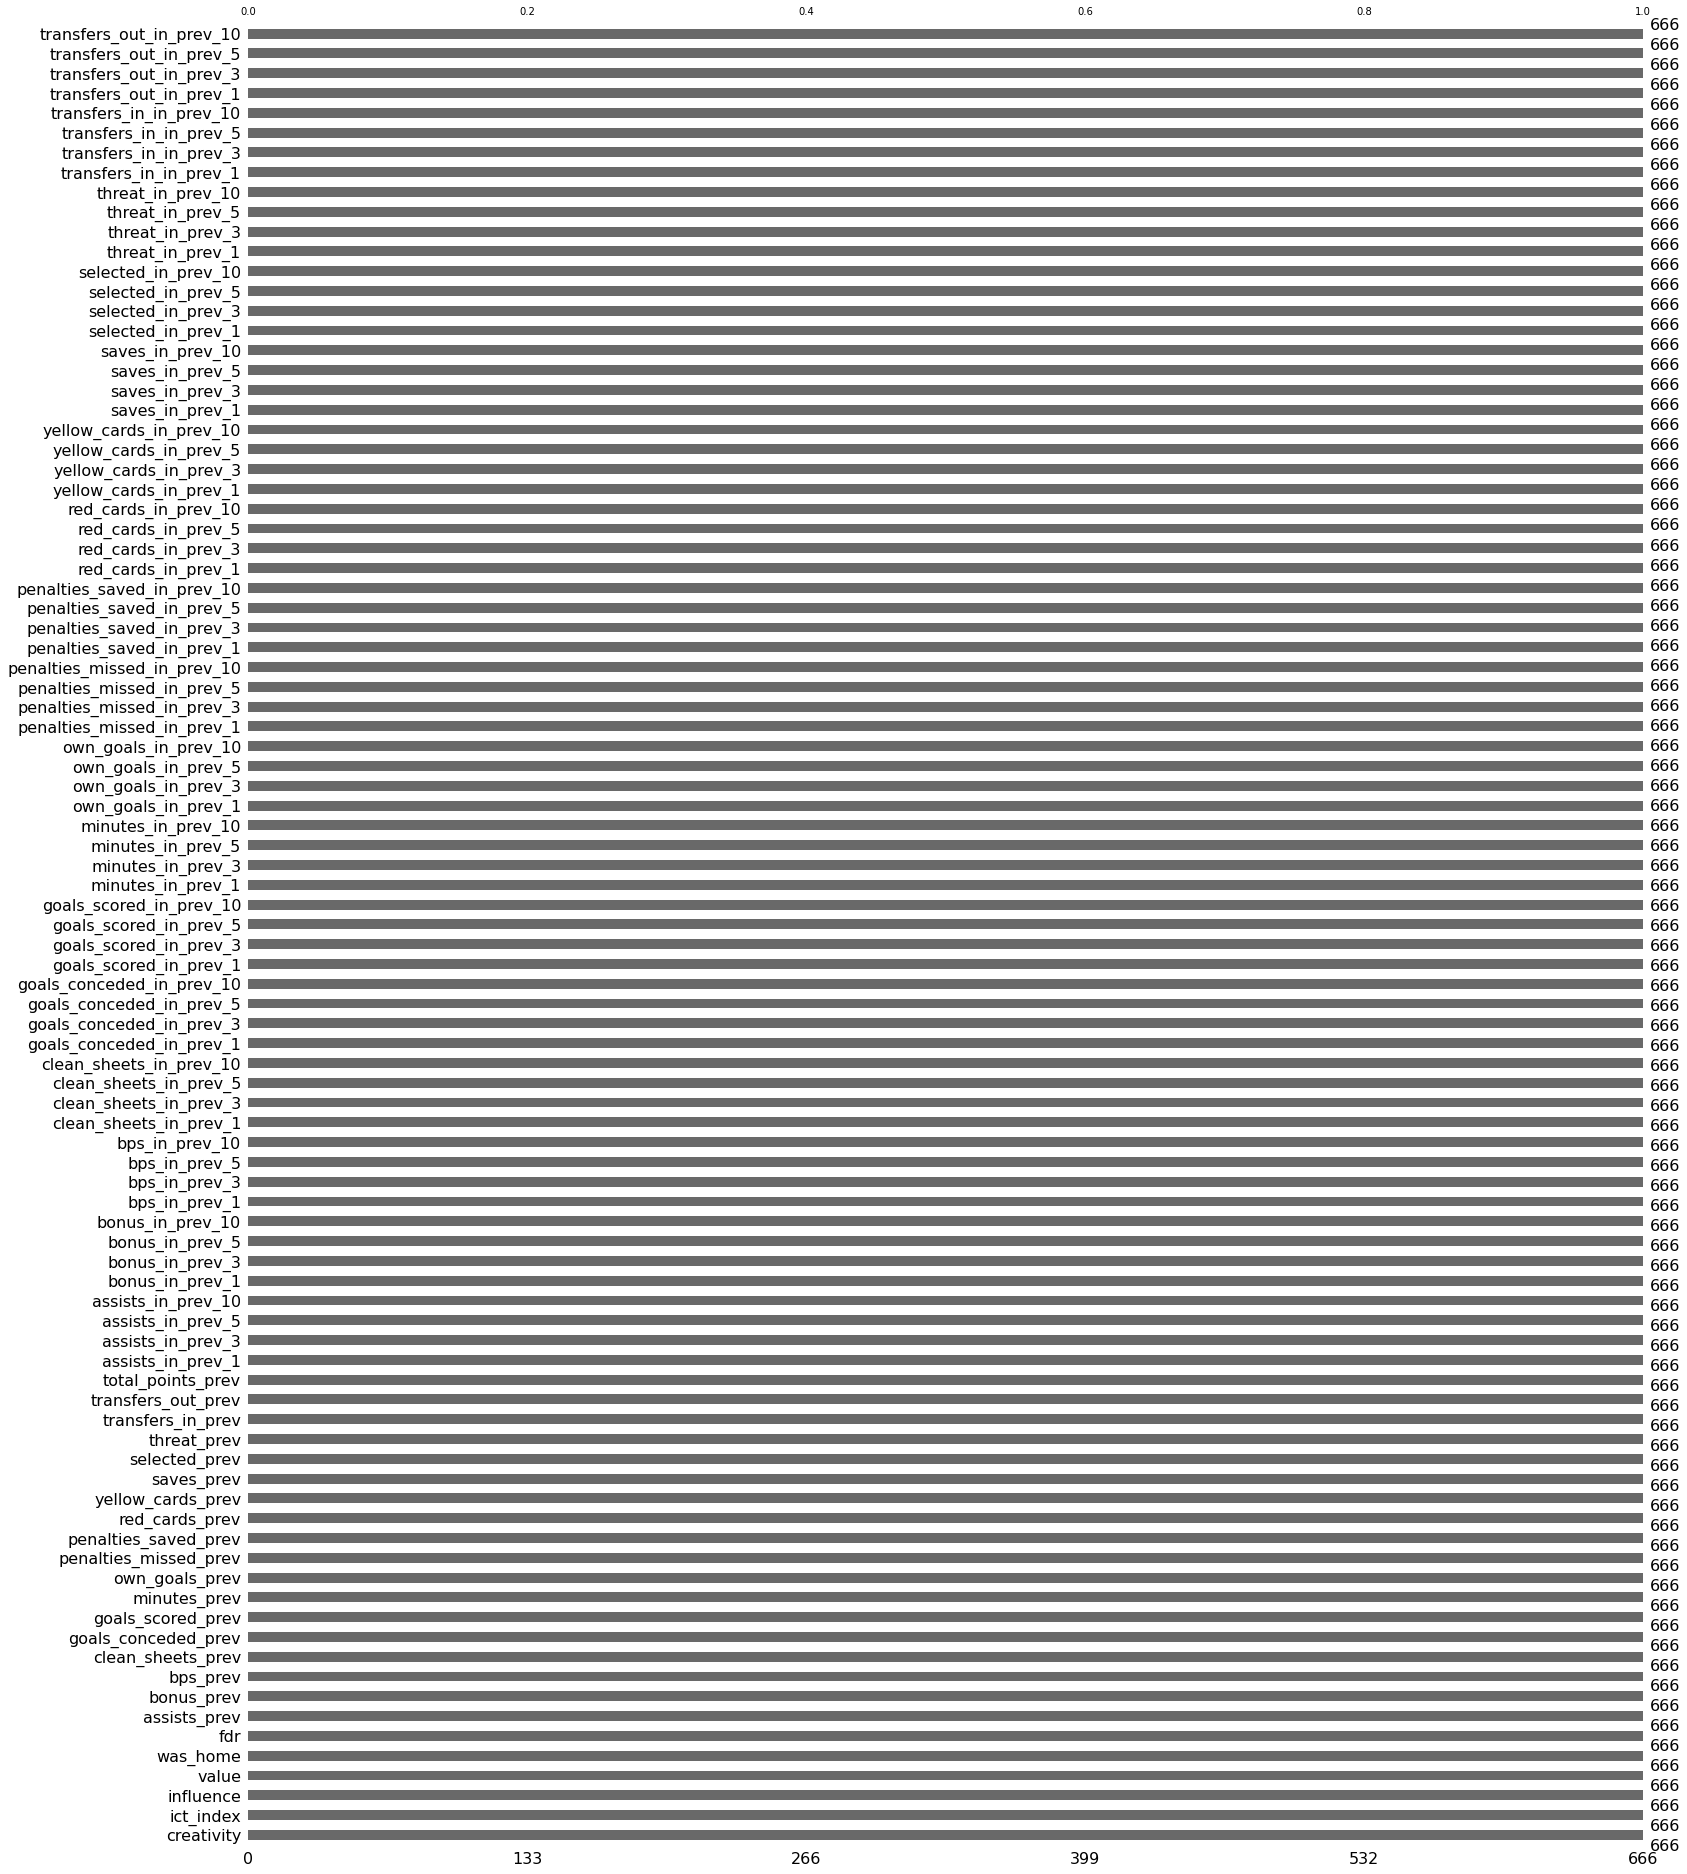

In [135]:
msno.bar(X_test)

<AxesSubplot:>

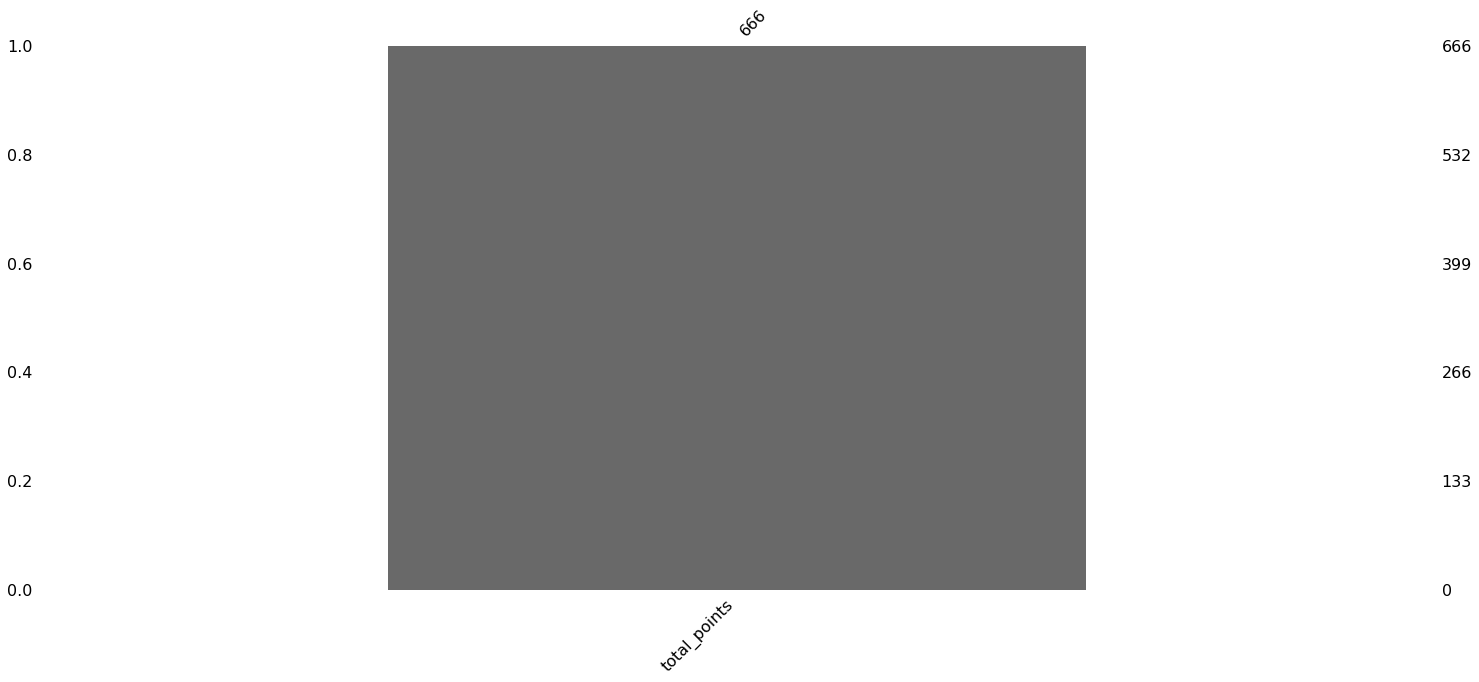

In [136]:
msno.bar(y_test)

In [137]:
%time predictions = model.predict(X_test)

CPU times: user 10.8 ms, sys: 11.7 ms, total: 22.5 ms
Wall time: 7.19 ms


In [138]:
predictions = [round(pred[0], ndigits=3) for pred in predictions]

In [139]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('RSquared value:', metrics.r2_score(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.64946996996997
RSquared value: 0.7469100983549617
Mean Squared Error: 1.3963418063063064
Root Mean Squared Error: 1.1816690764788196


In [140]:
actual_results = y_test.total_points.tolist()
comparison_df = pd.DataFrame(zip(predictions, actual_results), \
                                 columns=["model_predictions", "actual_results"])

In [141]:
comparison_df.sort_values(by=["actual_results"], ascending=False)

,model_predictions,actual_results
214,18.986,19
10,16.016,16
459,9.680,14
433,11.044,13
67,9.630,12
...,...,...
273,3.354,0
272,3.679,0
271,-0.137,0
274,3.306,-1


In [142]:
comparison_df.shape

(666, 2)

#### Learn more here: [link](https://stats.stackexchange.com/questions/104622/what-does-an-actual-vs-fitted-graph-tell-us)

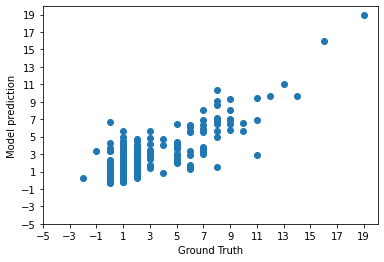

In [143]:
plt.scatter(comparison_df.actual_results, comparison_df.model_predictions)
plt.xlabel("Ground Truth")
plt.ylabel("Model prediction")
plt.xticks(np.arange(-5, 20, 2))
plt.yticks(np.arange(-5, 20, 2))
plt.show()

In [144]:
comparison_df["element"] = unseen_data[unseen_data.index.isin(y_test.index.tolist())]["element"].tolist()

In [145]:
comparison_df.shape

(666, 3)

In [146]:
final_predictions_df = pd.merge(player_general_info_1920_df, comparison_df, how="inner", on="element").\
drop_duplicates().sort_values(by="model_predictions", ascending=False)

In [147]:
final_predictions_df.query("position == 'GKP'")

,first_name,second_name,position,team_name,element,model_predictions,actual_results
5612,Ederson,Santana de Moraes,GKP,Man City,212,5.486,7
5808,Emiliano,Martínez,GKP,Arsenal,427,4.954,1
116,Aaron,Ramsdale,GKP,Bournemouth,494,4.828,3
10257,Jordan,Pickford,GKP,Everton,148,4.745,2
18895,Tim,Krul,GKP,Norwich,280,4.327,1
...,...,...,...,...,...,...,...
1820,Artur,Boruc,GKP,Bournemouth,73,-0.172,0
13127,Mark,Travers,GKP,Bournemouth,74,-0.173,0
16260,Pontus,Dahlberg,GKP,Watford,367,-0.174,0
21078,Archie,Mair,GKP,Norwich,551,-0.193,0


In [148]:
final_predictions_df.query("position == 'DEF'")

,first_name,second_name,position,team_name,element,model_predictions,actual_results
11377,Kieran,Tierney,DEF,Arsenal,515,9.471,11
19509,Virgil,van Dijk,DEF,Liverpool,183,9.334,9
9828,John,Lundstram,DEF,Sheffield Utd,297,8.010,7
5266,Diego,Rico,DEF,Bournemouth,65,6.914,7
14049,Michael,Keane,DEF,Everton,143,6.738,0
...,...,...,...,...,...,...,...
4606,Daryl,Janmaat,DEF,Watford,359,-0.198,0
12893,Marc,Navarro,DEF,Watford,360,-0.200,0
20646,Dimitri,Foulquier,DEF,Watford,542,-0.201,0
21047,Akin,Famewo,DEF,Norwich,552,-0.202,1


In [149]:
final_predictions_df.query("position == 'MID'")

,first_name,second_name,position,team_name,element,model_predictions,actual_results
11298,Kevin,De Bruyne,MID,Man City,215,18.986,19
13395,Mason,Mount,MID,Chelsea,463,9.680,14
16376,Raheem,Sterling,MID,Man City,214,8.586,8
16768,Riyad,Mahrez,MID,Man City,217,8.042,9
22415,Bruno Miguel,Borges Fernandes,MID,Man Utd,618,6.913,11
...,...,...,...,...,...,...,...
14552,Moritz,Leitner,MID,Norwich,288,-0.164,0
5420,Domingos,Quina,MID,Watford,375,-0.165,0
22368,Ignacio,Pussetto,MID,Watford,604,-0.172,0
19125,Tom,Trybull,MID,Norwich,290,-0.211,0


In [150]:
final_predictions_df.sort_values(by=["actual_results"], ascending=False).query("position == 'FWD'").head(10)

,first_name,second_name,position,team_name,element,model_predictions,actual_results
16181,Pierre-Emerick,Aubameyang,FWD,Arsenal,11,16.016,16
3334,Che,Adams,FWD,Southampton,437,11.044,13
10490,Joshua,King,FWD,Bournemouth,68,9.630,12
4492,Danny,Welbeck,FWD,Watford,512,7.050,9
3754,Chris,Wood,FWD,Burnley,91,5.779,9
7361,Harry,Kane,FWD,Spurs,338,6.934,9
21142,Dwight,Gayle,FWD,Newcastle,554,6.481,9
4378,Danny,Ings,FWD,Southampton,313,7.183,8
14438,Moise,Kean,FWD,Everton,496,9.088,8
5342,Divock,Origi,FWD,Liverpool,188,4.995,8


In [151]:
final_predictions_df.to_csv("../data/training_1920/gw_38_1920_predictions.csv", index=False)

In [152]:
player_general_info_1920_df.to_csv("../data/training_1920/season_2019_2021_player_info.csv", index=False)

In [153]:
import pickle
with open("../models/xP_baseline_v1.pkl", "wb") as file:
    pickle.dump(model, file)

### Clean up 2020-21 FPL dataset